In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('DataAnalyst.csv',encoding='gb2312')
#df
#df.info()

In [4]:
#check data and data clean
len(df.positionId.unique())
# 5031< 6876,so exist duplicate
df_unique=df.drop_duplicates(subset='positionId',keep='first')
len(df_unique.positionId.unique())
#5031=5031,so all id is unique

5031

In [6]:
def cleanSalaryRange(column):
    position = column.find('-')
    if position != -1:
        bottomSalary = column[:position-1]
    else:
        bottomSalary = column[:column.upper().find('K')]
    return bottomSalary
df_unique['bottomSalary'] = df_unique.salary.apply(cleanSalaryRange)
#transfer to int

E:\Data Analysis\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
def cleanSalaryRange(column):
    position = column.find('-')
    length = len(column)
    if position != -1:
        topSalary = column[position+1:length-1]
    else:
        topSalary = column[:column.upper().find('K')]
    return topSalary
df_unique['topSalary'] = df_unique.salary.apply(cleanSalaryRange)


E:\Data Analysis\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
df_unique['topSalary']=df_unique.topSalary.astype('int')
df_unique['bottomSalary']=df_unique.bottomSalary.astype('int')
df_unique['avgSalary'] =  df_unique.apply(lambda x:(x.bottomSalary+x.topSalary)/2,axis=1)

E:\Data Analysis\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Data Analysis\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Data Analysis\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [56]:
df_unique.city.value_counts()

北京    2347
上海     979
深圳     527
杭州     406
广州     335
成都     135
南京      83
武汉      69
西安      38
苏州      37
厦门      30
长沙      25
天津      20
Name: city, dtype: int64

In [57]:
df_unique.avgSalary.describe()

count    5031.000000
mean       17.111409
std         8.996242
min         1.500000
25%        11.500000
50%        15.000000
75%        22.500000
max        75.000000
Name: avgSalary, dtype: float64

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

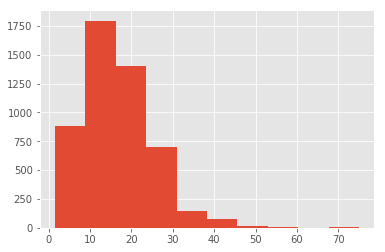

In [59]:
df_unique.avgSalary.hist()

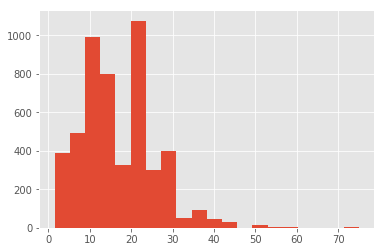

In [62]:
df_unique.avgSalary.hist(bins=20)
#because the range use big int, so 10K,15K,20k are more popular

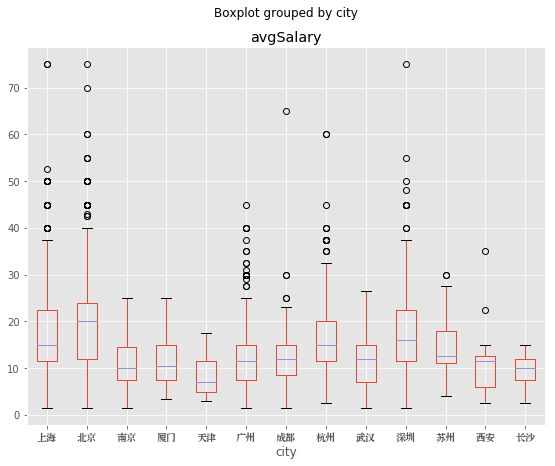

In [69]:
from matplotlib.font_manager import FontProperties
font_zh =  FontProperties(fname="Songti.ttc")
ax = df_unique.boxplot(column='avgSalary',by='city',figsize=(9,7))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

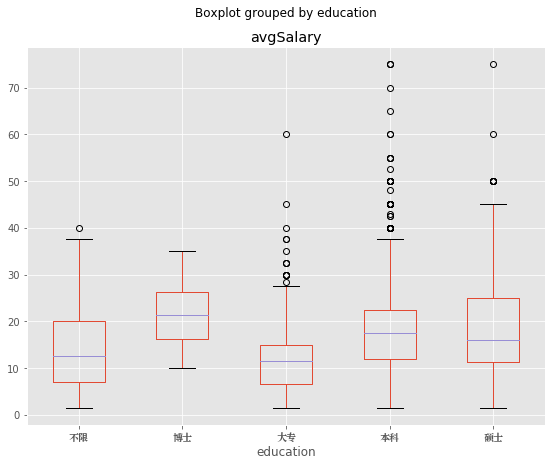

In [76]:
ax = df_unique.boxplot(column='avgSalary',by='education',figsize=(9,7))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

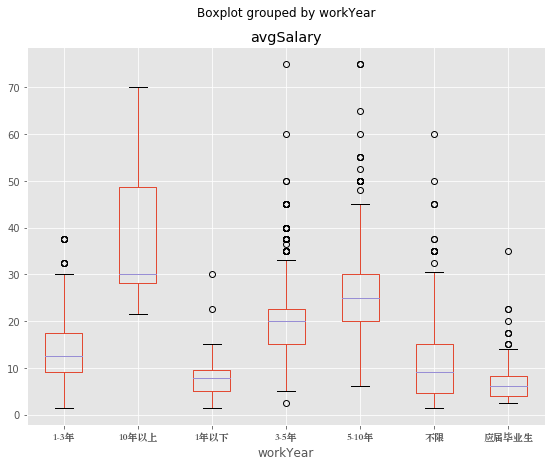

In [77]:
ax = df_unique.boxplot(column='avgSalary',by='workYear',figsize=(9,7))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

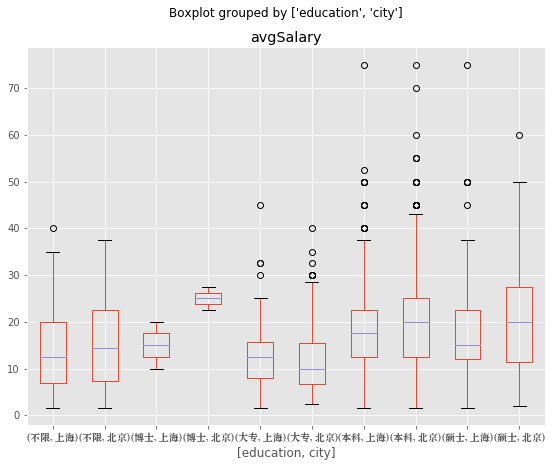

In [79]:
df_unique_shbj=df_unique[df_unique['city'].isin(['上海','北京'])]
ax = df_unique_shbj.boxplot(column='avgSalary',by=['education','city'],figsize=(9,7))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

In [9]:
df_uniqueSelected=df_unique[['city','companyShortName','companySize','education','positionName','positionLables','workYear','avgSalary']]
df_uniqueSelected.groupby('city').count()
df_uniqueSelected.groupby(['city','education']).mean()
df_uniqueSelected.groupby(['city','education']).mean().unstack()
df_uniqueSelected.groupby(['city','education']).avgSalary.count().unstack()

education,不限,博士,大专,本科,硕士
city,,,,,
上海,68.0,3.0,110.0,723.0,75.0
北京,124.0,2.0,190.0,1877.0,154.0
南京,5.0,NaN,11.0,61.0,6.0
厦门,3.0,NaN,7.0,18.0,2.0
天津,1.0,NaN,4.0,15.0,NaN
广州,12.0,NaN,84.0,232.0,7.0
成都,8.0,NaN,26.0,99.0,2.0
杭州,26.0,NaN,58.0,303.0,19.0
武汉,10.0,NaN,14.0,44.0,1.0


In [94]:
df_uniqueSelected.groupby('companyShortName').avgSalary.agg(['count','mean']).sort_values(by='count',ascending=False)

,count,mean
companyShortName,,
美团点评,175,21.862857
滴滴出行,64,27.351562
百度,44,19.136364
网易,36,18.208333
今日头条,32,17.125000
腾讯,32,22.437500
京东,32,20.390625
百度外卖,31,17.774194
个推,31,14.516129


In [95]:
df_uniqueSelected.groupby('companyShortName').avgSalary.agg(lambda x:max(x)-min(x))

companyShortName
12580               0.0
12家全国性股份制商业银行之一     0.0
1号店                22.0
2345.com            4.0
360                22.0
360企业安全             0.0
360金融               0.0
4399                0.0
4399游戏              5.0
500.com集团          15.0
51Talk 无忧英语        15.0
51信用卡管家            20.0
51爱趣淘               0.0
55海淘                0.0
58到家               30.0
58车                 0.0
AIRCOS              0.0
APUS Group         27.0
AbleCloud           2.5
Adhub               0.0
Alading Bank        0.0
Asia-analytics      0.0
Avazu Holding       0.0
BBD                63.5
BOE                 0.0
BTCC                3.0
BUGBANK             0.0
BW                  5.5
Baca                0.0
Base FX             0.0
                   ... 
驻云                  0.0
高伟达软件股份有限公司        17.5
高升控股               12.5
高德联讯                0.0
高校邦                 0.0
高阳通联                0.0
鬼吹灯3D               0.0
魔品科技                0.0
魔秀科技                2.5
魔窗                 10.0

In [99]:
def TopN(df,n=5):
    counts = df.value_counts()
    return counts.sort_values(ascending=False)[:n]
df_uniqueSelected.groupby('city').companyShortName.apply(TopN)

city                 
上海    饿了么                 23
      美团点评                19
      买单侠                 15
      返利网                 15
      点融网                 11
北京    美团点评               156
      滴滴出行                60
      百度                  39
      今日头条                32
      百度外卖                31
南京    途牛旅游网                8
      通联数据                 7
      中地控股                 6
      创景咨询                 5
      竞情数据                 3
厦门    美图公司                 4
      厦门融通信息技术有限责任公司       2
      Datartisan 数据工匠      2
      佰模_                  1
      光鱼全景                 1
天津    神州商龙                 2
      众嘉禾励                 1
      58到家                 1
      广州卓为                 1
      天阳科技                 1
广州    探迹                  11
      唯品会                  9
      广东亿迅                 8
      阿里巴巴移动事业群-UC         7
      卡宝宝                  6
                        ... 
杭州    个推                  22
      网易                  15
      有数金服           

In [100]:
df_uniqueSelected.groupby('city').positionName.apply(TopN)

city                        
上海    数据分析师                      79
      大数据开发工程师                   37
      数据产品经理                     31
      大数据工程师                     26
      高级数据分析师                    20
北京    数据分析师                     238
      数据产品经理                    121
      大数据开发工程师                   69
      分析师                        49
      数据分析                       42
南京    大数据开发工程师                    5
      数据分析师                       5
      大数据架构师                      3
      大数据工程师                      3
      数据规划                        2
厦门    数据分析专员                      3
      数据分析师                       3
      大数据开发工程师                    2
      数据算法分析师                     1
      高级业务分析师                     1
天津    数据分析师                       3
      数据工程师                       2
      数据仓库工程师                     1
      数据分析专员（运营）                  1
      云计算/分布式/大数据培训讲师/技术合伙人       1
广州    数据分析师                      31
      需求分析师                      23

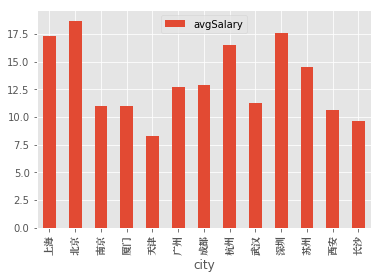

In [103]:
ax=df_uniqueSelected.groupby('city').mean().plot.bar()
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

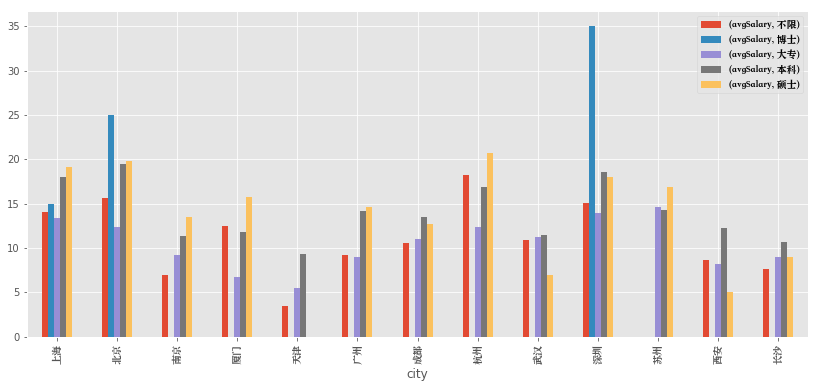

In [105]:
ax=df_uniqueSelected.groupby(['city','education']).mean().unstack().plot.bar(figsize=(14,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)
ax.legend(prop=font_zh)

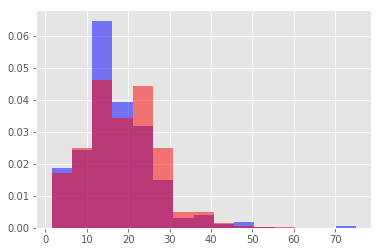

In [108]:
plt.hist(x=df_uniqueSelected[df_uniqueSelected.city=='上海'].avgSalary,
        bins=15,
        normed=1,
        facecolor='blue',
        alpha=0.5)
plt.hist(x=df_uniqueSelected[df_uniqueSelected.city=='北京'].avgSalary,
        bins=15,
        normed=1,
        facecolor='red',
        alpha=0.5)
plt.show()

In [113]:
bins=[0,3,5,10,15,20,30,100]
level=['0-3','3-5','5-10','10-15','15-20','20-30','30+']
df_uniqueSelected['level']=pd.cut(df_uniqueSelected['avgSalary'],bins=bins,labels=level)
df_uniqueSelected[['avgSalary','level']]

E:\Data Analysis\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,avgSalary,level
0,8.0,5-10
1,12.5,10-15
2,5.0,3-5
3,7.0,5-10
4,2.5,0-3
5,12.5,10-15
6,10.5,10-15
7,6.0,5-10
8,6.0,5-10
9,3.0,0-3


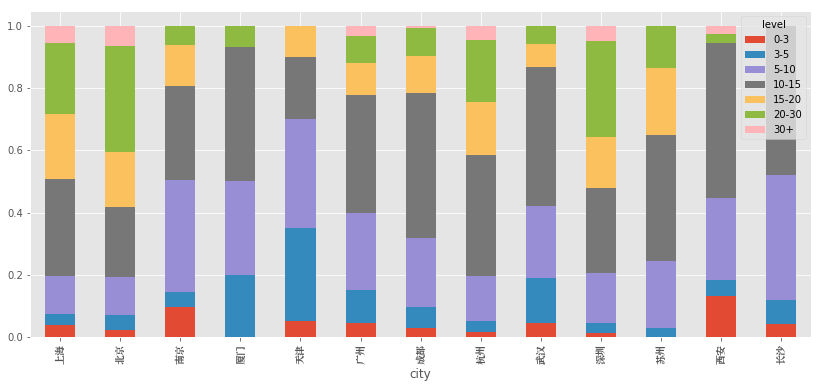

In [117]:
df_level=df_uniqueSelected.groupby(['city','level']).avgSalary.count().unstack()
df_level_prop = df_level.apply(lambda x:x/x.sum(),axis=1)
ax=df_level_prop.plot.bar(stacked=True,figsize=(14,6))
for label_x in ax.get_xticklabels():
    label_x.set_fontproperties(font_zh)

In [10]:
df_uniqueSelected.positionLables
df_uniqueSelected.positionLables.str[1:-1]
df_uniqueSelected.positionLables.str[1:-1].str.replace(' ','')

0                           '分析师','数据分析','数据挖掘','数据'
1                           '分析师','数据分析','数据挖掘','数据'
2                                  '分析师','数据分析','数据'
3                              '商业','分析师','大数据','数据'
4                             '分析师','数据分析','数据','BI'
5                        '实习','投资','FA','行业研究','分析师'
6                                               '数据'
7                       '需求分析','顾问','咨询','咨询顾问','数据'
8                                        '后端开发','数据'
9                                               '数据'
10                                   '平台','大数据','数据'
11                                       '数据分析','数据'
12                                  '数据分析','数据','BI'
13                                              '数据'
14                                        '大数据','数据'
15                                              '数据'
16                                        '大数据','数据'
17                                        '分析师','内容'
18                                            

In [11]:
word=df_uniqueSelected.positionLables.str[1:-1].str.replace(' ','')
word.dropna().str.split(',').apply(pd.value_counts)

,'分析师','数据分析','数据','数据挖掘','大数据','商业','BI','行业研究','FA','实习',...,'性能测试','协议分析','在线','供应链','技术岗位','云平台','SEM','J2EE','文案','专利'
0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_word=word.dropna().str.split(',').apply(pd.value_counts)
df_word.unstack()
df_word.unstack().dropna().reset_index()
df_word_counts = df_word.unstack().dropna().reset_index().groupby('level_0').count()

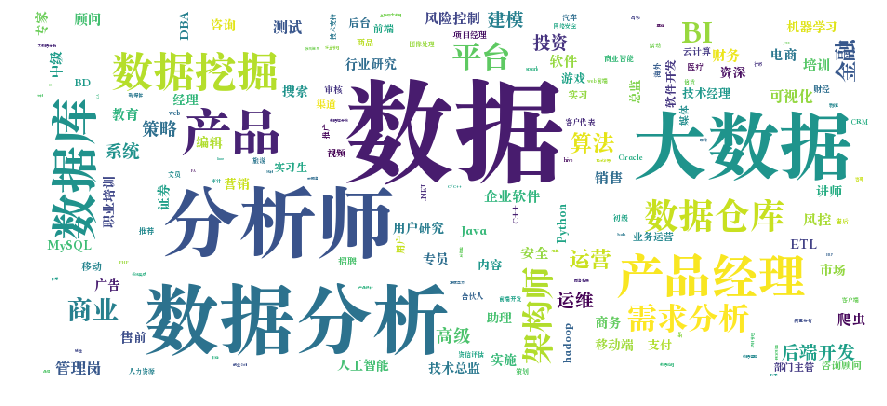

In [36]:
from wordcloud import WordCloud
df_word_counts.index = df_word_counts.index.str.replace("'","")
wordcloud = WordCloud(font_path = "Songti.ttc",width=900,height=400,background_color="white")
f,ax= plt.subplots(figsize=(15,15))
wordcloud.fit_words(df_word_counts.level_1)
axs = plt.imshow(wordcloud)
plt.axis('off')
plt.show()